In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [25]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url,sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
for i in data.keys():
  print(f"{i} has {len(np.unique(data[i]))} unique values") #unique vals per columns

fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


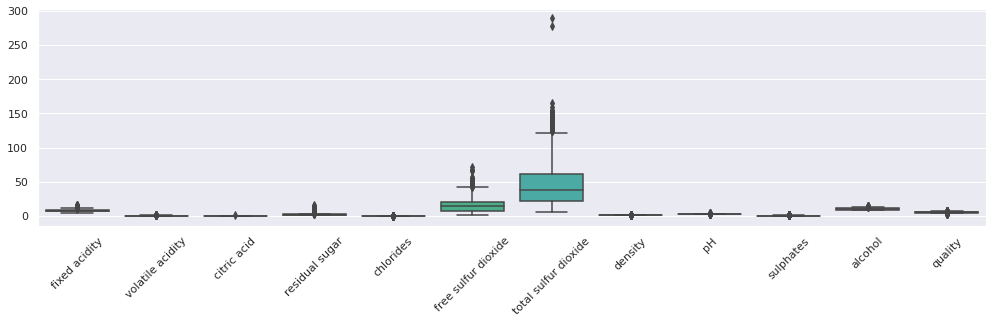

In [28]:
sns.set_theme()

fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [29]:
# removing rows with outliers
data = data[data['total sulfur dioxide']<200] 

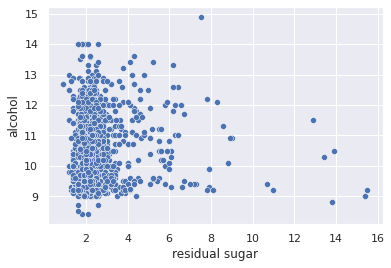

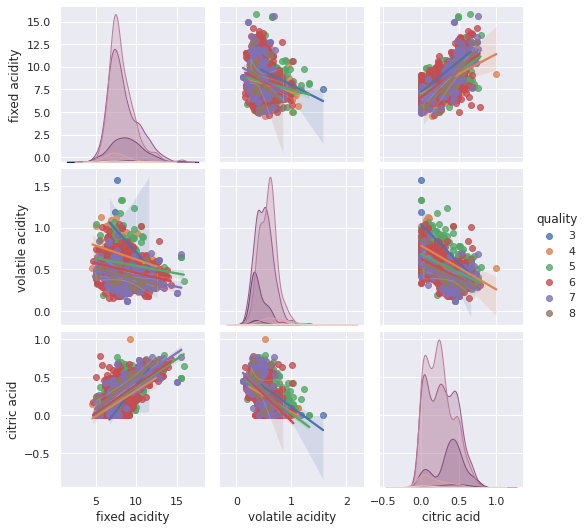

In [30]:
sns.scatterplot(x=data['residual sugar'],y=data['alcohol'])
plt.show()

# pairwise plots
cols2plot = ['fixed acidity','volatile acidity','citric acid','quality']
sns.pairplot(data[cols2plot],kind='reg',hue='quality')
plt.show()

# T-test for acidity on wine quality




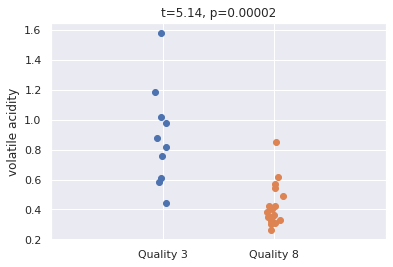

In [31]:
# t-test of volatile acidity on quality = 3 v/s quality = 8
x = data['volatile acidity'][data['quality']==3]
y = data['volatile acidity'][data['quality']==8]
ttest = stats.ttest_ind(x,y)

plt.plot(np.random.randn(len(x))/30,x,'o', 1+np.random.randn(len(y))/30,y, 'o')
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Quality 3','Quality 8'])
plt.title(f't={ttest[0]:.2f}, p={ttest[1]:.5f}')
plt.ylabel('volatile acidity')
plt.show()


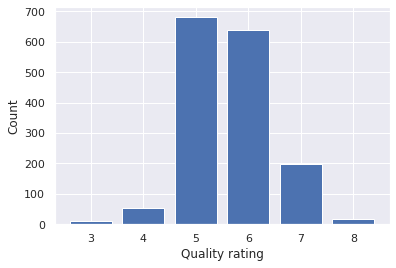

In [32]:
qualcounts = np.zeros(6)

n = 0
for i in range(3,9):
  qualcounts[n] = len( data[data['quality']==i] )
  n += 1

plt.bar(range(3,9), qualcounts)
plt.xlabel('Quality rating')
plt.ylabel('Count')
plt.show()

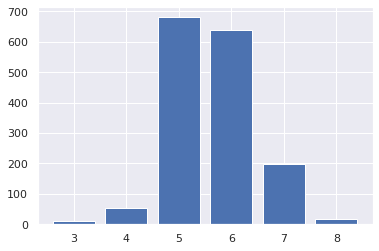

In [33]:
counts = data['quality'].value_counts()
plt.bar(list(counts.keys()),counts)
plt.show()

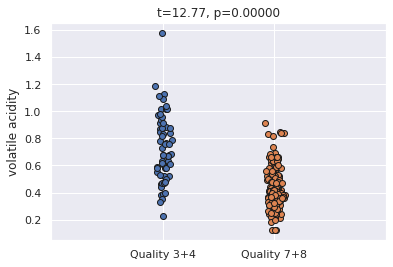

In [34]:
# t-test of volatile acidity on quality= 3/4 v/s 7/8

x = data['volatile acidity'][(data['quality']==3) | (data['quality']==4)]
y = data['volatile acidity'][(data['quality']==7) | (data['quality']==8)]
ttest = stats.ttest_ind(x,y )

plt.plot(np.random.randn(len(x))/30,x,'o', 
         1+np.random.randn(len(y))/30,y, 'o',markeredgecolor='k')
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Quality 3+4','Quality 7+8'])
plt.title(f't={ttest[0]:.2f}, p={ttest[1]:.5f}')
plt.ylabel('volatile acidity')
plt.show()


# Multiple regression

In [35]:
import statsmodels.api as sm

In [36]:
# predict quality from all other columns

dep_var  = data['quality']
ind_vars = data.drop(labels='quality',axis=1)

ind_vars = sm.add_constant(ind_vars) #intercept
model = sm.OLS(dep_var,ind_vars).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     81.47
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          1.30e-145
Time:                        11:05:50   Log-Likelihood:                -1564.5
No. Observations:                1597   AIC:                             3153.
Df Residuals:                    1585   BIC:                             3218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1410 

volatile acidity
chlorides
free sulfur dioxide
total sulfur dioxide
pH
sulphates
alcohol


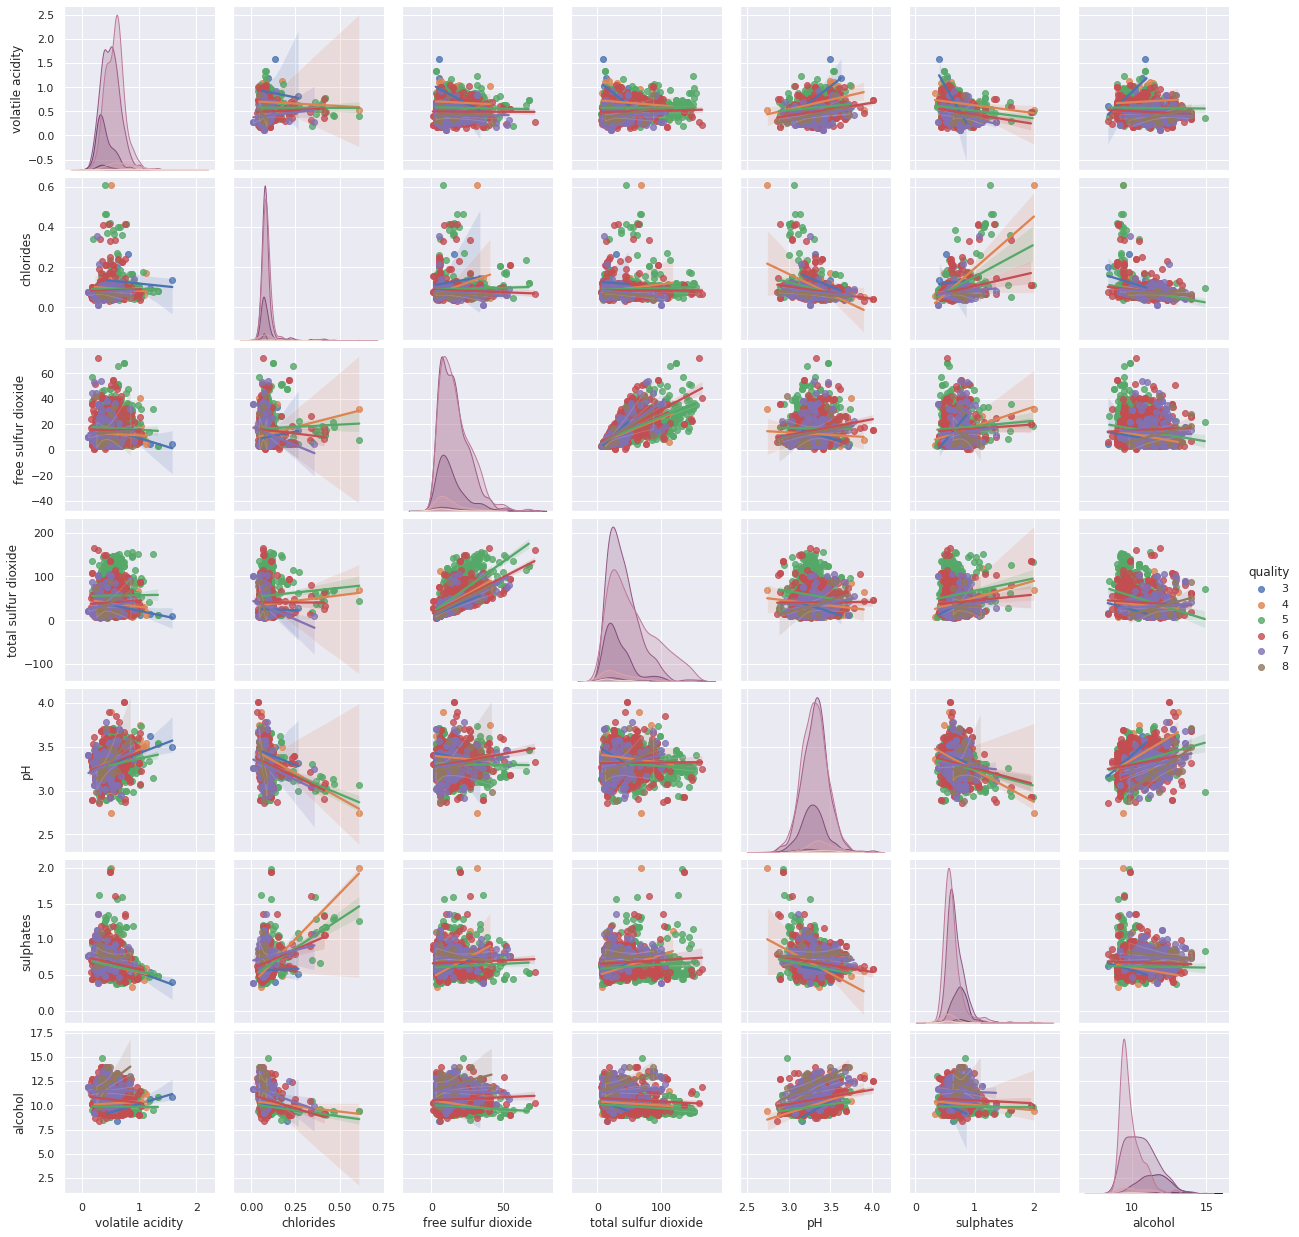

In [37]:
significant_columns = list(model.pvalues[model.pvalues<.05].keys())
[print(i) for i in significant_columns]
significant_columns.append('quality')

sns.pairplot(data[significant_columns],kind='reg',hue='quality')
plt.show()


# Logistic regression

In [38]:
# binarize wine quality
binthresh = np.mean(data['quality'])
print(binthresh)

data['binquality'] = data['quality']>binthresh
data

5.634314339386349


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,True
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,True
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


In [39]:
Xcols = []
for key in data.keys():
  if key not in ['quality','binquality']:
    Xcols.append(key)

In [40]:
model = sm.Logit(data['binquality'],data[Xcols])
results = model.fit(method='newton')
results.summary()

Optimization terminated successfully.
         Current function value: 0.516369
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binquality   No. Observations:                 1597
Model:                          Logit   Df Residuals:                     1586
Method:                           MLE   Df Model:                           10
Date:                Fri, 22 Jan 2021   Pseudo R-squ.:                  0.2525
Time:                        11:06:56   Log-Likelihood:                -824.64
converged:                       True   LL-Null:                       -1103.2
Covariance Type:            nonrobust   LLR p-value:                2.601e-113
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1020      0.063      1.609      0.108      -0.022       0.226
volatile acidity        -3.2749      0.485     -6.753      0.000      -4.225      -2.324
citric acid             -1.2889      0.565     -2.280      0.023      -2.397      -0.181
residual sugar           0.0292      0.044      0.671      0.502      -0.056       0.114
chlorides               -3.9542      1.564     -2.528      0.011      -7.020      -0.888
free sulfur dioxide      0.0264      0.008      3.144      0.002       0.010       0.043
total sulfur dioxide    -0.0189      0.003     -6.173      0.000      -0.025      -0.013
density                 -7.2770      2.362     -3.081      0.002     -11.907      -2.647
pH                      -0.4818      0.602     -0.800      0.424      -1.662       0.698
sulphates                2.8220      0.439      6.428      0.000       1.961       3.682
alcohol                  0.8804      0.074     11.856      0.000       0.735       1.026
========================================================================================
"""

In [41]:
significant_columnsL = list(results.pvalues[results.pvalues<.05].keys())

print("Significant predictors from standard regression:")
[print("  "+i) for i in significant_columnsL]

print(' ')
print("Significant predictors from logistic regression:")
[print("  "+i) for i in significant_columns[:-1]];

Significant predictors from standard regression:
  volatile acidity
  citric acid
  chlorides
  free sulfur dioxide
  total sulfur dioxide
  density
  sulphates
  alcohol
 
Significant predictors from logistic regression:
  volatile acidity
  chlorides
  free sulfur dioxide
  total sulfur dioxide
  pH
  sulphates
  alcohol


Transform to Gaussian

In [42]:
n = 500

x = np.cumsum(np.random.randn(n))
y = (stats.rankdata(x)/(n+1) - .5 )*2
y = np.arctanh(y)
print(np.min(y),np.max(y))

-3.1073040492110966 3.107304049211083


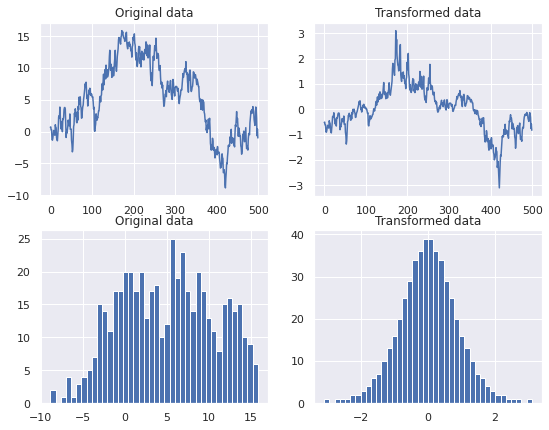

In [43]:
fig,ax = plt.subplots(2,2,figsize=(9,7))

ax[0,0].plot(x)
ax[0,0].set_title('Original data')
ax[0,1].plot(y)
ax[0,1].set_title('Transformed data')

ax[1,0].hist(x,bins=40)
ax[1,0].set_title('Original data')
ax[1,1].hist(y,bins=40)
ax[1,1].set_title('Transformed data')

plt.show()

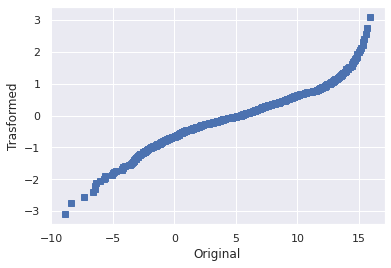

In [44]:
plt.plot(x,y,'s')
plt.xlabel('Original')
plt.ylabel('Trasformed')
plt.show()